<a href="https://colab.research.google.com/github/Yash1289/play_store_data_Eda/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

Any data scientist be it senior or junior spends almost 80% of its time on EDA , a process which includes cleaning and sorting the data and checking its feature correlation to weed out the noise and gain some insight as to what pieces are most useful

 **'The goal is to turn data into information and information into insight'**

This was said by Carly Fiorina , former CEO of Hewlett-Packard and with this same single view in mind we will also try to generate some useful information and insight from the database that we are going to work on over the course of this project 

At first we will go through our play store database and look for the factors that play a role in the engagement and success of an app and then we will go through our second database that is User reviews and look for any specific pattern in reviews wrote by the users while using various different apps





For this project we are going to use 

1.   Numpy :- For its linear algebra functions and the advantage it offers over list in terms of speed and memory consumed
2.   Pandas :- This will be our primary data analysis library necessary for almost all of our data manipulations jobs
3.   Matplotlib :- Basic visualization library that we need for plotting and graphs
4.   Seaborn :- For more customizable and advanced data visualization





In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [21]:
#Mounting our google drive so we can acess the files in it through our google collab noteboook

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
#Reading the csv file from our database

file_path = "/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Python For DataScience/Play Store Capstone Project/Play Store Data.csv"
play_store_df = pd.read_csv(file_path)

### Now we will perform some basic data exploration such as


*   Checking the head of the database to gain some general idea about the nature of the database 
*   Finding  out its shape to know how many observations and variables are in our dataset
*   We are also using info( ) to check the information about data and datatypes of each respective variable

All of this will help us to know our database better 

In [33]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [34]:
play_store_df.shape #As We can see we have in total 10841 observations and 13 variables

(10841, 13)

In [35]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [36]:
#Checking out the list of variables we have in our dataset

play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### Basic Data Cleaning to handle out the arbitary, duplicates as well as null and na values 

In [37]:
#Dropping out the duplicate observations having the same app name

play_store_df.drop_duplicates(subset ="App" , keep="first",inplace=True ,ignore_index=True)

In [38]:
play_store_df.shape #After dropping all the duplicates we have 9660 rows and 13 Columns

(9660, 13)

In [39]:
#Filtering out the observations having app rating more than 5 

arbitary_ratings = play_store_df[play_store_df["Rating"] > 5]
arbitary_ratings

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


As We can see above we have one app whose rating is more than 5 , and if we observe the data in this row more closely we can notice that the data of all the columns except "App" is shifted left by one place by one place in the row

In [40]:
#Getting the index of the row with max rating 
index = play_store_df["Rating"].argmax() 
#Shifting the columns in the row except "App" by one place to the right
play_store_df.iloc[index , 1: ] = play_store_df.iloc[index , 1: ].shift()  

In [41]:
#Changing the data type of Rating and Review column from String to float

play_store_df.loc[index , "Rating"] = float(play_store_df.loc[index ,"Rating"])
play_store_df.loc[index ,"Reviews"] = int(play_store_df.loc[index ,"Reviews"])

In [42]:
play_store_df.iloc[index]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 9300, dtype: object

In [43]:
#Checking out the number of null values we have across different variables

play_store_df.isnull().sum()

App                  0
Category             1
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

As we can see above ,most of the null values in our dataset is from Rating column which has in total 1463 null values

To handle all these missing values we can take two kinds of approach
1. Replace all missing values with the mean values 
2. Replace all the missing values with the median values 

If our dataset have extreme outliers we will use the 2nd method and if not then we will move forward with the first approach.





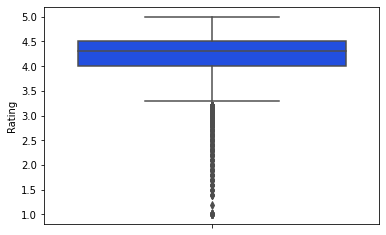

In [44]:
sns.boxplot( y = "Rating" , data=play_store_df , palette="bright")

As we can see above we have huge numbers of outliers in our database i.e we have great number of apps whose rating is beyond the lower and upper extremes of first and third quartile respectively so we will replace na values with median instead of mean

In [45]:
#Replacing na values of Rating with median values
play_store_df["Rating"] = np.where(play_store_df["Rating"].isna(), play_store_df["Rating"].median() , play_store_df["Rating"]  )

In [46]:
#Changing the data type of Rating and Reviews column from string to float and int

play_store_df["Rating"] = play_store_df["Rating"].astype(float)
play_store_df["Reviews"] = play_store_df["Reviews"].astype(int)

In [47]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9660 non-null   int64  
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9660 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9658 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 981.2+ KB


In [48]:
#Checking out the unique values of installs we have in out dataframe

play_store_df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [49]:
def stringToInt(installs):
  ''' Function to Convert string values of installs to its numeric value'''
  if installs == "0":
    return int(installs)
  else :
    return int(installs[:-1].replace(",",""))

In [50]:
#Changing the data type of Installs column from string to int 

play_store_df["Installs"] = play_store_df["Installs"].apply(stringToInt)

### Now as we are done with cleaning our data we will now move forward with our quest to find the key factors which makes an app popular on google play store . As app success and engagement is our main priority so at times we will limit our data analysis only up until apps which have more than or equal to 1 million downloads

In [52]:
#Filtering out apps having more than 1m download
apps_with_1m_downloads = play_store_df[play_store_df["Installs"] >= 1000000]

In [51]:
#Filtering out apps having more than 1m download
apps_with_1m_downloads = play_store_df[play_store_df["Installs"] >= 1000000]

#Finding the highest rated apps across our google play store data that have more than 1m downloads
highest_rated_apps = apps_with_1m_downloads[apps_with_1m_downloads["Rating"] == apps_with_1m_downloads["Rating"].max()]
highest_rated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38M,1000000,Free,0,Everyone,Auto & Vehicles,"July 15, 2018",8.31,4.1 and up
99,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14M,1000000,Free,0,Everyone,Beauty,"November 9, 2017",2.3.0,4.1 and up
585,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136,26M,1000000,Free,0,Everyone,Education;Education,"July 20, 2018",2.16.11.10,4.2 and up
1029,Lose Belly Fat in 30 Days - Flat Stomach,HEALTH_AND_FITNESS,4.9,38098,11M,5000000,Free,0,Everyone,Health & Fitness,"June 21, 2018",1.0.4,4.2 and up
1031,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,272337,13M,10000000,Free,0,Everyone,Health & Fitness,"June 21, 2018",1.0.2,4.2 and up
1078,StrongLifts 5x5 Workout Gym Log & Personal Tra...,HEALTH_AND_FITNESS,4.9,66791,10M,1000000,Free,0,Everyone,Health & Fitness,"July 30, 2018",Varies with device,Varies with device
5963,PixPanda - Color by Number Pixel Art Coloring ...,FAMILY,4.9,55723,14M,1000000,Free,0,Everyone,Entertainment,"June 4, 2018",3.3,4.0.3 and up
8490,JW Library,BOOKS_AND_REFERENCE,4.9,922752,Varies with device,10000000,Free,0,Everyone,Books & Reference,"June 15, 2018",Varies with device,Varies with device


One common pattern that is visible above is that all these apps with the highest rating is they all have a content rating of "Everyone" and it is something that we will explore more in detaill later down the line

In [59]:
#Finding out the lowest Rated app having more than 1 million downloads
lowest_rated_apps = apps_with_1m_downloads[apps_with_1m_downloads["Rating"] == apps_with_1m_downloads["Rating"].min()]
lowest_rated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4099,AppFinder by AppTap,TOOLS,2.0,2221,4.9M,5000000,Free,0,Everyone,Tools,"October 3, 2017",1.8.2.7,5.0 and up


We all know that the bar on which any app's success is measured is its Rating, number of Installations and number of Reviews . So if we try to sort our dataset on basis on number of Installs and Reviews , then that will give us a very good idea about which apps are most Popular (if not most well received)  on play store

In [ ]:
#Trying to find the top 10 apps which are most installed and have the most number of reviews 
highest_installed_apps = app_with_1m_downloads.sort_values(by =["Installs", "Reviews"] , ascending=[False, False] , ignore_index = True)[:10]
highest_installed_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3,Messenger – Text and Video Chat for Free,COMMUNICATION,4,56642847,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
4,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
5,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
6,Google Photos,PHOTOGRAPHY,4.5,10858556,Varies with device,1000000000,Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
7,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
8,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
9,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,Varies with device,1000000000,Free,0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device


In [ ]:
sns.barplot(x="Category" , data=highest_installed_apps)

In [ ]:
#Finding the most popular app across playstore based on number of reviews 
most_popular_app = play_store_df[play_store_df["Reviews"] == play_store_df["Reviews"].max()]
most_popular_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


**Facebook is the most popular app on playstore with the highest number of installs and reviews**

---



## After looking at the list of Best Rated and Most popular Apps it's time to look into what kind of apps are most well received i.e which category/genre of apps are more successful than other 

In [53]:
#checking out the number of category we have in total in our dataset
play_store_df["Category"].nunique()

33

Text(0.5, 1.0, 'Percentage of apps across different Categories')

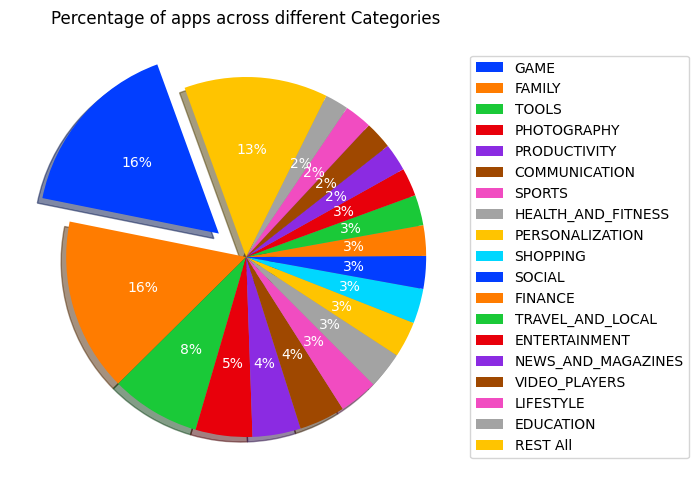

In [57]:
#Finding out the number of apps that we have in each category bracket
category_wise_apps = apps_with_1m_downloads["Category"].value_counts()

#Making a list of all Categories
category_wise_apps_list = category_wise_apps.index.tolist()
#Making a list of count of apps each category has 
category_wise_apps_count = list(category_wise_apps.values)

''' Plotting a pie chart to show the percentage of apps we have across
    different Categories , we will show individual pie pieces for top 18 
    categories and bundle out the rest into "Rest All" piece'''

slicingIndex = 18

category_wise_apps_list = category_wise_apps_list[:slicingIndex]
category_wise_apps_count_new = category_wise_apps_count[:slicingIndex]
sumofRest = sum(category_wise_apps_count[slicingIndex:])
category_wise_apps_list.append("REST All")
category_wise_apps_count_new.append(sumofRest)

totalCategories = len(category_wise_apps_count_new)

fig_1 = plt.figure(figsize=(8,5),dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
plt.rcParams['text.color'] = 'black'
colors = sns.color_palette('bright')[0:totalCategories]

explode = [0]*totalCategories
explode[0] = 0.2

wedges, texts, autotexts = plt.pie(category_wise_apps_count_new, explode=explode, labels = category_wise_apps_list, colors=colors, 
                                    autopct='%1.0f%%', shadow=True, startangle=110, 
                                    textprops=dict(color="w"))

plt.legend(wedges, category_wise_apps_list, loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Percentage of apps across different Categories")

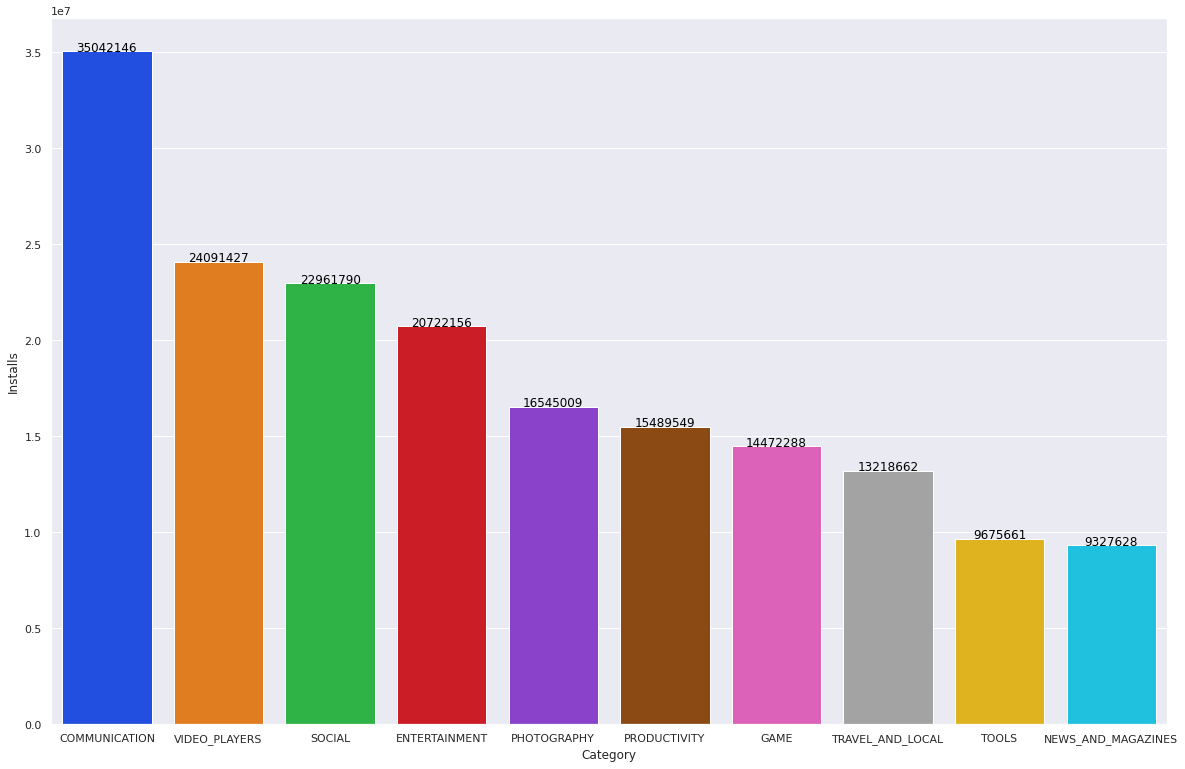

In [ ]:
installs_groupby = play_store_df.groupby("Category").agg({ "Installs" : "mean"}).reset_index().sort_values(by = "Installs" , ascending=False ,ignore_index=True)[:10]
installs_groupby["Installs"] = installs_groupby["Installs"].astype("int64")
installs_groupby

plt.rcParams['figure.figsize'] = 20,13
sns.set_context('paper', font_scale=1.4)
sns.set_theme(style='darkgrid')
g = sns.barplot(x='Category',y='Installs',data = installs_groupby, palette = 'bright',estimator = np.mean)
for index, row in installs_groupby.iterrows():
  g.text(row.name,row.Installs, round(row.Installs,2), color='black', ha="center")

In [ ]:
play_store_df["Rating"] = play_store_df["Rating"].astype("float64")
ratings_groupby = play_store_df.groupby("Category").agg({"Rating" : "mean"}).reset_index()
ratings_groupby


,Category,Rating
0,ART_AND_DESIGN,4.349602
1,AUTO_AND_VEHICLES,4.190567
2,BEAUTY,4.260503
3,BOOKS_AND_REFERENCE,4.308334
4,BUSINESS,4.133256
5,COMICS,4.181840
6,COMMUNICATION,4.134601
7,DATING,4.018047
8,EDUCATION,4.362954
9,ENTERTAINMENT,4.135294


In [ ]:
#Delete
highest_across_category = play_store_df.groupby(["Category"]).agg({ "Installs" : "max" , "App" : "first"}).reset_index()
highest_across_category

,Category,Installs,App
0,ART_AND_DESIGN,50000000,Photo Editor & Candy Camera & Grid & ScrapBook
1,AUTO_AND_VEHICLES,10000000,Monster Truck Stunt 3D 2019
2,BEAUTY,10000000,Hush - Beauty for Everyone
3,BOOKS_AND_REFERENCE,1000000000,Wattpad 📖 Free Books
4,BUSINESS,100000000,Visual Voicemail by MetroPCS
5,COMICS,10000000,LINE WEBTOON - Free Comics
6,COMMUNICATION,1000000000,Messenger – Text and Video Chat for Free
7,DATING,10000000,"Moco+ - Chat, Meet People"
8,EDUCATION,100000000,Duolingo: Learn Languages Free
9,ENTERTAINMENT,1000000000,Netflix


In [ ]:
#Delete
highest_rated_across_category = app_with_1m_downloads.groupby("Category").agg({ "Rating": "max" , "App" : "first"})
highest_rated_across_category

,Rating,App
Category,,
ART_AND_DESIGN,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
AUTO_AND_VEHICLES,4.9,Real Tractor Farming
BEAUTY,4.9,"ipsy: Makeup, Beauty, and Tips"
BOOKS_AND_REFERENCE,4.9,Wattpad 📖 Free Books
BUSINESS,4.8,Visual Voicemail by MetroPCS
COMICS,4.8,LINE WEBTOON - Free Comics
COMMUNICATION,4.8,Messenger – Text and Video Chat for Free
DATING,4.5,Zoosk Dating App: Meet Singles
EDUCATION,4.9,Duolingo: Learn Languages Free


In [ ]:
highest_installed_across_content = play_store_df.groupby("Content Rating").agg({ "Installs" : "max" , "App" : "first"})
highest_installed_across_content

,Installs,App
Content Rating,,
Adults only 18+,1000000,Manga Master - Best manga & comic reader
Everyone,1000000000,Photo Editor & Candy Camera & Grid & ScrapBook
Everyone 10+,1000000000,Superheroes Wallpapers | 4K Backgrounds
Mature 17+,500000000,"Secrets of beauty, youth and health"
Teen,1000000000,Sketch - Draw & Paint
Unrated,50000,Best CG Photography


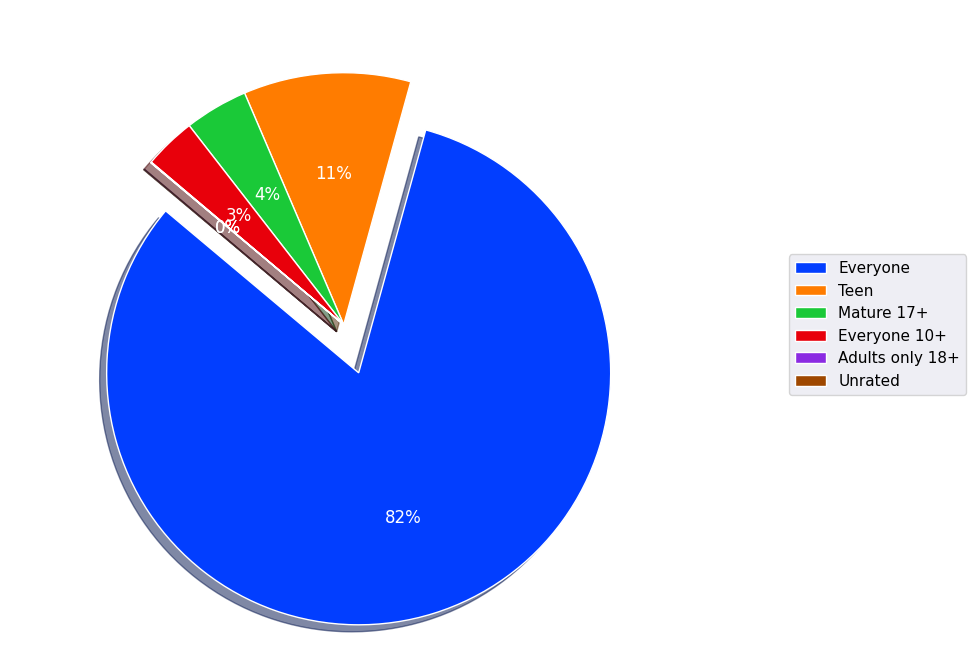

In [ ]:
content_rating_count = play_store_df["Content Rating"].value_counts()
content_rating_list = content_rating_count.index.tolist()
content_rating_apps_count = content_rating_count.values

totalCategories = len(content_rating_list)

fig_1 = plt.figure(figsize=(10,7),dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
plt.rcParams['text.color'] = 'black'
colors = sns.color_palette('bright')[0:totalCategories]

explode = [0]*totalCategories
explode[0] = 0.2

wedges, texts, autotexts = plt.pie(content_rating_apps_count, explode=explode, labels = content_rating_list, colors=colors, 
                                    autopct='%1.0f%%', shadow=True, startangle=140, 
                                    textprops=dict(color="w"))

plt.legend(wedges, content_rating_list, loc='right', bbox_to_anchor=(1, 0, 0.5, 1))

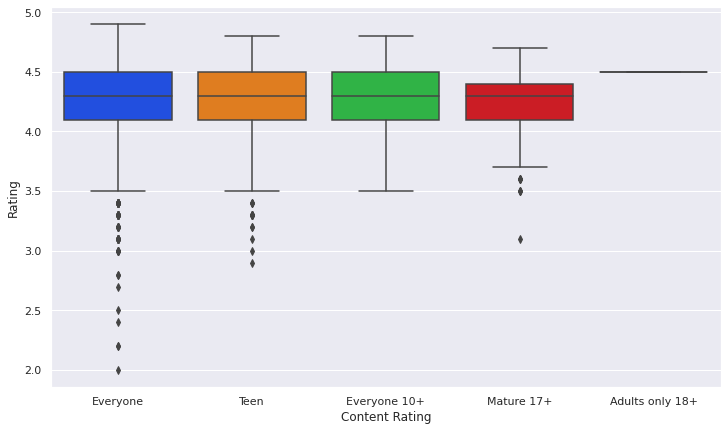

In [ ]:
#Plotting a boxplot using seaborn of Rating acorss content Rating

plt.rcParams['figure.figsize'] = 12,7
ax = sns.boxplot(x="Content Rating" , y = "Rating" , data=app_with_1m_downloads , palette="bright")

In [ ]:

{highest_rated_acorss_content = app_with_1m_downloads.groupby("Content Rating").agg({ "Rating" : "max" , "App" : "first" })
highest_rated_acorss_content


,Rating,App
Content Rating,,
Adults only 18+,4.5,DraftKings - Daily Fantasy Sports
Everyone,4.9,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
Everyone 10+,4.8,Police Detector (Speed Camera Radar)
Mature 17+,4.7,Read books online
Teen,4.8,Sketch - Draw & Paint


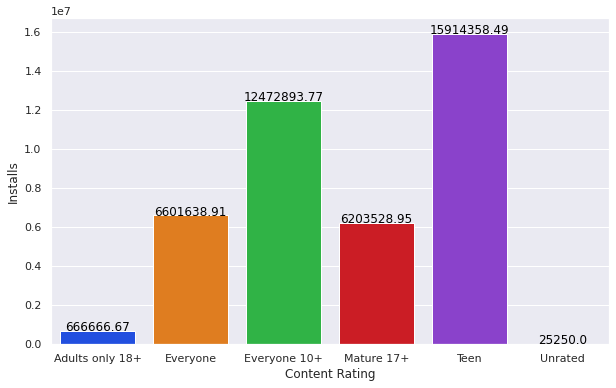

In [ ]:
content_installs_mean = play_store_df.groupby("Content Rating").agg({ "Installs" : "mean"}).reset_index()
content_installs_mean
plt.rcParams['figure.figsize'] = 10,6
sns.set_context('paper', font_scale=1.4)
sns.set_theme(style='darkgrid')
g = sns.barplot(x='Content Rating',y='Installs',palette = 'bright',data = content_installs_mean ,estimator = np.mean)
for index, row in content_installs_mean.iterrows():
  g.text(row.name,row.Installs, round(row.Installs,2), color='black', ha="center")

## 2nd DataFrame

In [ ]:
file_path2 = "/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Python For DataScience/Play Store Capstone Project/User Reviews.csv"
app_review_df = pd.read_csv(file_path2)

In [ ]:
app_review_df.head(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


In [ ]:
app_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
app_review_df.dropna( inplace=True)

In [ ]:
app_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
app_review_df["count"] = app_review_df.groupby('App')['App'].transform('count')
most_reviews_apps = app_review_df.sort_values(by="count" , ascending=False , ignore_index=True)
most_reviews_apps

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,count
0,Bowmasters,"Should vary videos required watch, least give ...",Positive,0.042857,0.394286,312
1,Bowmasters,Just Awesome bloody fun! Think Mortal Kombat b...,Positive,0.386111,0.822222,312
2,Bowmasters,Ui needs work. Hero select frustrating. Too ma...,Positive,0.050000,0.700000,312
3,Bowmasters,"It uses Target advertising let hit "" thank you...",Neutral,0.000000,0.000000,312
4,Bowmasters,I rate 4 stars ads chests really annoying I'm ...,Negative,-0.182727,0.570909,312
...,...,...,...,...,...,...
37422,Bed Time Fan - White Noise Sleep Sounds,"If app, I'd lug fan everywhere, love it!!",Positive,0.781250,0.600000,1
37423,CBS News,I hoping find feature yesterday news find it.,Neutral,0.000000,0.000000,1
37424,Calculator - unit converter,Its great calculator India India different num...,Positive,0.183333,0.533333,1
37425,DashClock Widget,"Most still functional, Gmail integration appea...",Positive,0.033333,0.419048,1


In [ ]:
most_reviewed_app = most_reviews_apps[most_reviews_apps["count"] == most_reviews_apps["count"].max()]
most_reviewed_app

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,count
0,Bowmasters,"Should vary videos required watch, least give ...",Positive,0.042857,0.394286,312
1,Bowmasters,Just Awesome bloody fun! Think Mortal Kombat b...,Positive,0.386111,0.822222,312
2,Bowmasters,Ui needs work. Hero select frustrating. Too ma...,Positive,0.050000,0.700000,312
3,Bowmasters,"It uses Target advertising let hit "" thank you...",Neutral,0.000000,0.000000,312
4,Bowmasters,I rate 4 stars ads chests really annoying I'm ...,Negative,-0.182727,0.570909,312
...,...,...,...,...,...,...
307,Bowmasters,Perfect game.. A Biiittt violent bloody though.,Negative,-0.250000,0.825000,312
308,Bowmasters,Awesome game! Videos make game freeze sometime...,Negative,-0.140000,0.520000,312
309,Bowmasters,"This game amazing creative. Just suggestion, w...",Positive,0.175000,0.700000,312
310,Bowmasters,"Fun game, ads invasive forced. I installed fro...",Negative,-0.133333,0.266667,312


In [ ]:
from wordcloud import WordCloud, STOPWORDS

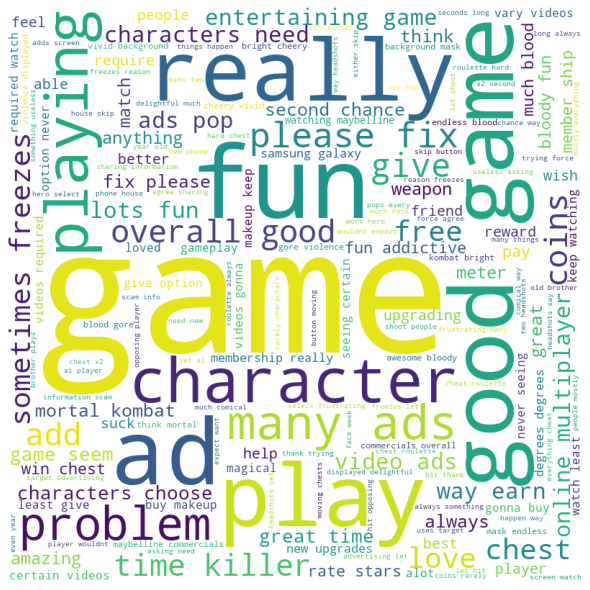

In [ ]:
review_words= ""
stopwords = set(STOPWORDS)

for index,row in most_reviewed_app.iterrows():
  review_words += row["Translated_Review"]

review_words = review_words.lower()

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(review_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [ ]:
app_groupby2 = most_reviews_apps.groupby(["App" , "Sentiment"] ,sort=False).agg({"Translated_Review" : "count"}).reset_index()[:15]
app_groupby2_pivot = app_groupby2.pivot(index="App" , columns="Sentiment" , values="Translated_Review")
app_groupby2_pivot

Sentiment,Negative,Neutral,Positive
App,,,
8 Ball Pool,106,9,104
Angry Birds Classic,147,2,124
Bowmasters,119,24,169
"CBS Sports App - Scores, News, Stats & Watch Live",42,27,123
Helix Jump,58,6,209


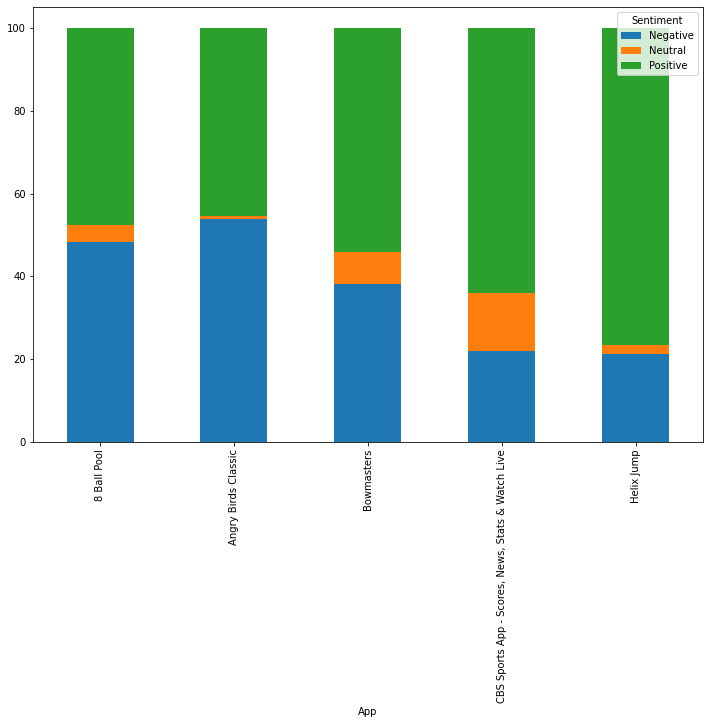

In [ ]:
app_groupby2_pivot = app_groupby2_pivot.apply(lambda x: x*100/sum(x), axis=1)
app_groupby2_pivot.plot(kind="bar" , stacked=True , figsize=(12,8))